In [2]:
from nltk_utils import Helper
import random
from gensim import models
import json
import pickle
import numpy as np
import tensorflow as tf
from string import punctuation
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
# tf.config.set_visible_devices([], 'GPU')

2024-07-01 17:44:52.241001: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 17:44:52.241138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 17:44:52.323471: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-01 17:44:52.501964: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-01 17:44:54.556551: W tensorflow/compiler/tf2

In [3]:

df = pd.read_csv('./assets/data.csv')
# df.head()

slang_df = pd.read_csv('./assets/slangs.csv')


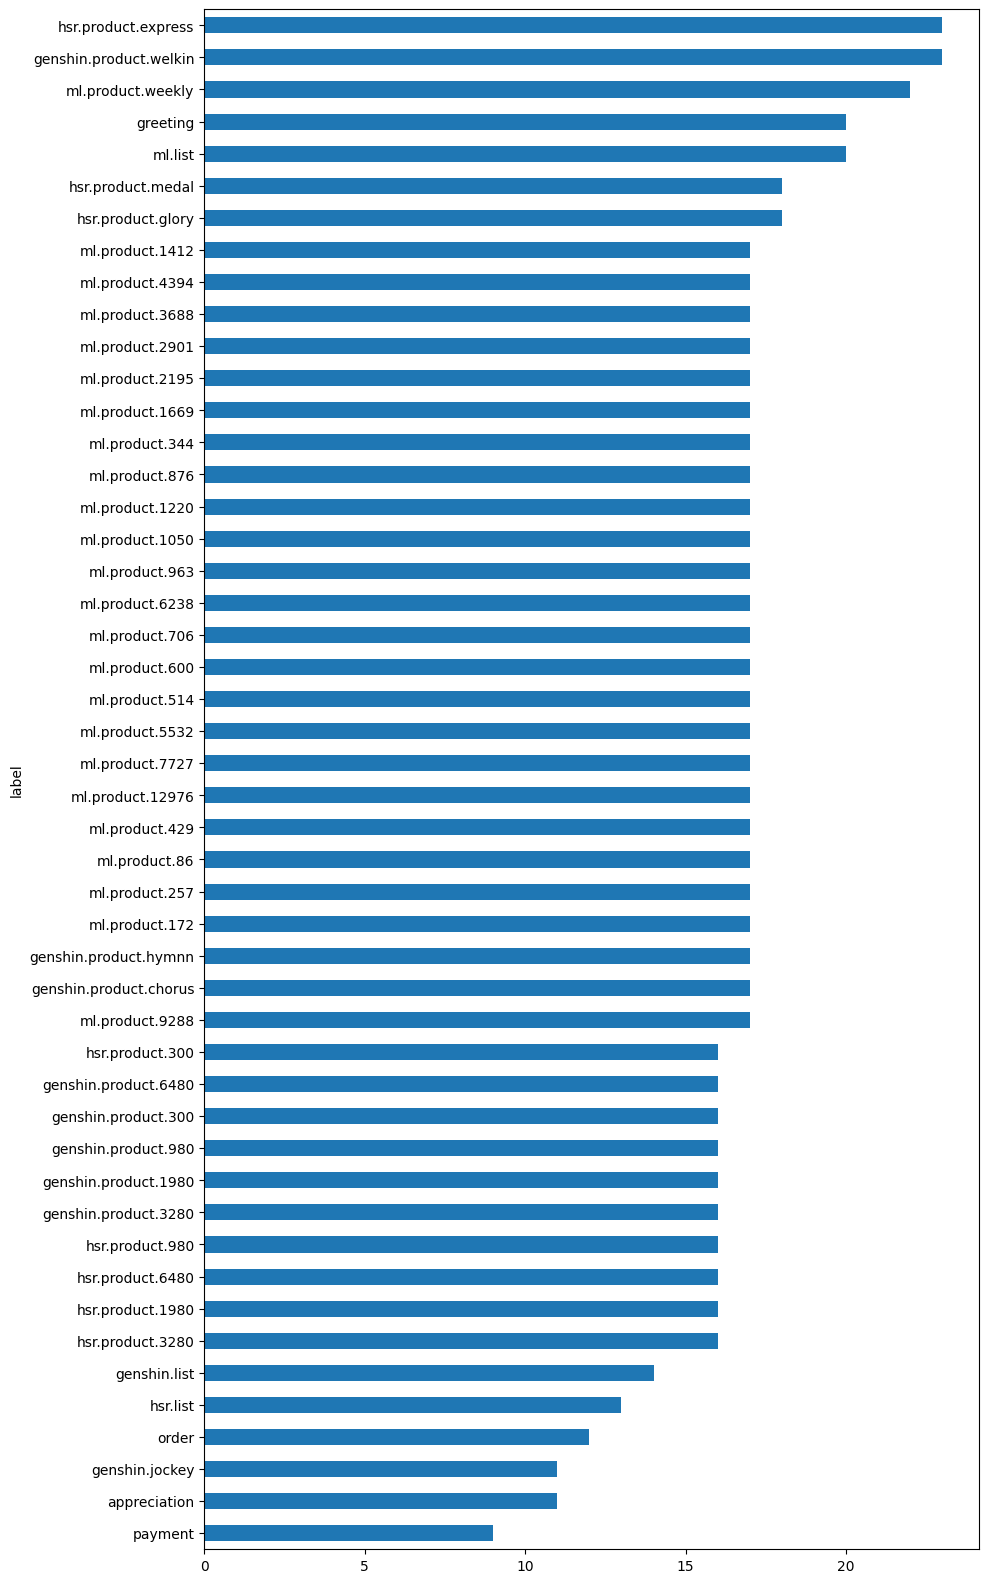

In [5]:
# import matplotlib.pyplot as plt
# fig , ax = plt.subplots(1,1)
# fig.set_size_inches(20,10)
# fig = df["tag"].value_counts().plot.barh(ax)

import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,1)
fig.set_size_inches(10,20)
s = df["label"].value_counts()
s = s.sort_values()
fig = s.plot.barh(ax)
fig.figure.savefig('./assets/labels.png')


## Preprocess

### Manage Slang words

In [4]:
helper = Helper()
patterns = df.pattern.values
labels = df.label.values
removed_slangs = []
for text in patterns:
    removed_slangs.append(helper.slang_cleaning(text, slang_df))

removed_slangs

['hi',
 'hei',
 'halo',
 'selamat pagi',
 'selamat siang',
 'selamat sore',
 'halo admin mau tanya',
 'admin mau top up sudah buka belum',
 'sudah bisa top up admin ?',
 'halo kak',
 'kak , mau top up',
 'admin , mau top up ready kah ?',
 'hai admin',
 'ini dengan adeptushop ?',
 'permisi , ini benar dengan yang instagram nya adeptushop ?',
 'ini benar kontak nya adeptushop ?',
 'apa benar ini adeptushop ?',
 'yang adeptushop bukan ?',
 'ini yang toko top up bukan ?',
 'ini dengan adeptushop ya ?',
 'ini cara order nya bagaimana admin',
 'lewat uid atau apa ya ?',
 'lewat id atau apa ya ?',
 'pakai id admin ? ?',
 'via login apa uid bang ?',
 'meminta format order nya admin',
 'cara beli nya bagaimana ya ?',
 'jadi nya yang itu deh',
 'format nya bagaimana',
 'mau deh yang itu',
 'boleh deh yang itu',
 'mau beli admin , bagaimana format nya',
 'admin , transfer nya kemana ?',
 'transfer nya bagaimana ya bang',
 'bayar nya kemana ya ?',
 'bayar kemana bang',
 'lewat apa bayar nya ?',
 '

### Remove Stopwords

In [5]:
removed_stopwords = []
for text in removed_slangs:
    removed_stopwords.append(helper.stopword_removal(text))

removed_stopwords

['hi',
 'hei',
 'halo',
 'selamat pagi',
 'selamat siang',
 'selamat sore',
 'halo admin',
 'admin top up buka',
 'top up admin?',
 'halo kak',
 'kak, top up',
 'admin, top up ready kah?',
 'hai admin',
 'adeptushop?',
 'permisi, instagram adeptushop?',
 'kontak adeptushop?',
 'adeptushop?',
 'adeptushop?',
 'toko top up?',
 'adeptushop?',
 'order admin',
 'uid?',
 'id?',
 'pakai id admin??',
 'login uid bang?',
 'format order admin',
 'beli?',
 'deh',
 'format',
 'deh',
 'deh',
 'beli admin, format',
 'admin, transfer kemana?',
 'transfer bang',
 'bayar kemana?',
 'bayar kemana bang',
 'bayar?',
 'qris enggak?',
 'kemana transfer?',
 'pakai mandiri?',
 'no transfer',
 'pricelist genshin impact?',
 'pricelist harga genshin impact kak',
 'listnya admin, genshin impact',
 'pricelist genshin impact',
 'pricelist genshin impact admin',
 'genshin impact pricelist',
 'genshin impact',
 'daftar harga genshin impact kak',
 'lihat harga genshinnya kak?',
 'daftar genshin impact',
 'daftar harga

In [6]:
removed_stopwords = []
for text in removed_slangs:
    removed_stopwords.append(helper.stopword_removal(text))

removed_stopwords

['hi',
 'hei',
 'halo',
 'selamat pagi',
 'selamat siang',
 'selamat sore',
 'halo admin',
 'admin top up buka',
 'top up admin?',
 'halo kak',
 'kak, top up',
 'admin, top up ready kah?',
 'hai admin',
 'adeptushop?',
 'permisi, instagram adeptushop?',
 'kontak adeptushop?',
 'adeptushop?',
 'adeptushop?',
 'toko top up?',
 'adeptushop?',
 'order admin',
 'uid?',
 'id?',
 'pakai id admin??',
 'login uid bang?',
 'format order admin',
 'beli?',
 'deh',
 'format',
 'deh',
 'deh',
 'beli admin, format',
 'admin, transfer kemana?',
 'transfer bang',
 'bayar kemana?',
 'bayar kemana bang',
 'bayar?',
 'qris enggak?',
 'kemana transfer?',
 'pakai mandiri?',
 'no transfer',
 'pricelist genshin impact?',
 'pricelist harga genshin impact kak',
 'listnya admin, genshin impact',
 'pricelist genshin impact',
 'pricelist genshin impact admin',
 'genshin impact pricelist',
 'genshin impact',
 'daftar harga genshin impact kak',
 'lihat harga genshinnya kak?',
 'daftar genshin impact',
 'daftar harga

### Tokenize + Lowercasing

In [7]:

tokenized_text = []
for text in removed_stopwords:
    tokenized_text.append(helper.tokenize(text))

tokenized_text

[['hi'],
 ['hei'],
 ['halo'],
 ['selamat', 'pagi'],
 ['selamat', 'siang'],
 ['selamat', 'sore'],
 ['halo', 'admin'],
 ['admin', 'top', 'up', 'buka'],
 ['top', 'up', 'admin', '?'],
 ['halo', 'kak'],
 ['kak', ',', 'top', 'up'],
 ['admin', ',', 'top', 'up', 'ready', 'kah', '?'],
 ['hai', 'admin'],
 ['adeptushop', '?'],
 ['permisi', ',', 'instagram', 'adeptushop', '?'],
 ['kontak', 'adeptushop', '?'],
 ['adeptushop', '?'],
 ['adeptushop', '?'],
 ['toko', 'top', 'up', '?'],
 ['adeptushop', '?'],
 ['order', 'admin'],
 ['uid', '?'],
 ['id', '?'],
 ['pakai', 'id', 'admin', '?', '?'],
 ['login', 'uid', 'bang', '?'],
 ['format', 'order', 'admin'],
 ['beli', '?'],
 ['deh'],
 ['format'],
 ['deh'],
 ['deh'],
 ['beli', 'admin', ',', 'format'],
 ['admin', ',', 'transfer', 'kemana', '?'],
 ['transfer', 'bang'],
 ['bayar', 'kemana', '?'],
 ['bayar', 'kemana', 'bang'],
 ['bayar', '?'],
 ['qris', 'enggak', '?'],
 ['kemana', 'transfer', '?'],
 ['pakai', 'mandiri', '?'],
 ['no', 'transfer'],
 ['pricelist',

### Filtering

In [8]:
clean_patterns = []
for text in tokenized_text:
    clean_patterns.append(helper.remove_punctuations(text))

clean_patterns

[['hi'],
 ['hei'],
 ['halo'],
 ['selamat', 'pagi'],
 ['selamat', 'siang'],
 ['selamat', 'sore'],
 ['halo', 'admin'],
 ['admin', 'top', 'up', 'buka'],
 ['top', 'up', 'admin'],
 ['halo', 'kak'],
 ['kak', 'top', 'up'],
 ['admin', 'top', 'up', 'ready', 'kah'],
 ['hai', 'admin'],
 ['adeptushop'],
 ['permisi', 'instagram', 'adeptushop'],
 ['kontak', 'adeptushop'],
 ['adeptushop'],
 ['adeptushop'],
 ['toko', 'top', 'up'],
 ['adeptushop'],
 ['order', 'admin'],
 ['uid'],
 ['id'],
 ['pakai', 'id', 'admin'],
 ['login', 'uid', 'bang'],
 ['format', 'order', 'admin'],
 ['beli'],
 ['deh'],
 ['format'],
 ['deh'],
 ['deh'],
 ['beli', 'admin', 'format'],
 ['admin', 'transfer', 'kemana'],
 ['transfer', 'bang'],
 ['bayar', 'kemana'],
 ['bayar', 'kemana', 'bang'],
 ['bayar'],
 ['qris', 'enggak'],
 ['kemana', 'transfer'],
 ['pakai', 'mandiri'],
 ['no', 'transfer'],
 ['pricelist', 'genshin', 'impact'],
 ['pricelist', 'harga', 'genshin', 'impact', 'kak'],
 ['listnya', 'admin', 'genshin', 'impact'],
 ['priceli

### Convert to Train data

In [9]:
tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(clean_patterns)
train = tokenizer.texts_to_sequences(clean_patterns)
train

[[88],
 [89],
 [76],
 [77, 73],
 [77, 90],
 [77, 91],
 [76, 2],
 [2, 3, 4, 92],
 [3, 4, 2],
 [76, 14],
 [14, 3, 4],
 [2, 3, 4, 15, 93],
 [94, 2],
 [70],
 [9, 95, 70],
 [96, 70],
 [70],
 [70],
 [97, 3, 4],
 [70],
 [78, 2],
 [83],
 [84],
 [85, 84, 2],
 [98, 83, 8],
 [79, 78, 2],
 [7],
 [32],
 [79],
 [32],
 [32],
 [7, 2, 79],
 [2, 74, 75],
 [74, 8],
 [80, 75],
 [80, 75, 8],
 [80],
 [99, 27],
 [75, 74],
 [85, 100],
 [101, 74],
 [29, 20, 21],
 [29, 13, 20, 21, 14],
 [81, 2, 20, 21],
 [29, 20, 21],
 [29, 20, 21, 2],
 [20, 21, 29],
 [20, 21],
 [60, 13, 20, 21, 14],
 [82, 13, 102, 14],
 [60, 20, 21],
 [60, 13, 20, 21, 2],
 [73, 65, 60, 13, 20, 21],
 [65, 29, 20, 21],
 [65, 60, 13, 20, 21],
 [13, 71, 20, 21],
 [71],
 [64],
 [71, 14],
 [63, 20, 21],
 [64],
 [63, 20, 21],
 [64],
 [63, 20, 21],
 [3, 4, 64],
 [3, 4, 63, 20, 21, 2],
 [2, 7, 64],
 [2, 7, 64],
 [2, 7, 63, 20, 21],
 [64, 16],
 [63, 20, 21, 16],
 [64, 15, 27],
 [63, 20, 21, 15, 27],
 [64, 2],
 [71, 2],
 [71, 8],
 [9, 3, 4, 71],
 [9, 3, 

In [10]:
word_index = tokenizer.word_index
print('unique tokens: ' + str(len(word_index)))
# word_index

unique tokens: 113


In [11]:
f = open('assets/tokenizer.pickle', 'wb')
pickle.dump(tokenizer, f)
f.close()

In [12]:
# hyper params
max_len=20
output_dim=300

In [13]:
train = pad_sequences(train, maxlen=20)
train
# len(tags)

array([[ 0,  0,  0, ...,  0,  0, 88],
       [ 0,  0,  0, ...,  0,  0, 89],
       [ 0,  0,  0, ...,  0,  0, 76],
       ...,
       [ 0,  0,  0, ...,  0, 66, 67],
       [ 0,  0,  0, ...,  0, 66, 67],
       [ 0,  0,  0, ..., 66, 67,  2]], dtype=int32)

### Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
classes = []
kategori_list = pd.unique(df.label.values)
kategori_list = kategori_list.tolist()
for i in range(len(labels)):
    one_hot = np.zeros((len(kategori_list),), dtype=int)
    idx = kategori_list.index(labels[i])
    one_hot[idx] = 1
    classes.append(one_hot)
classes = np.array(classes)
encoder = LabelEncoder()
labels = encoder.fit_transform(kategori_list)
print(labels)
print(classes)
labels = dict()
for i in range(len(kategori_list)) :
    labels[i] = kategori_list[i]
print(labels)

f = open('assets/labels.pickle', 'wb')
pickle.dump(labels, f)
f.close()

[11 46 47  2 10  4  7  3  5  6  9  8  1 12 18 14 17 13 15 16 19 20 21 45
 41 27 29 31 33 35 37 39 42 44 22 23 25 26 28 30 32 34 36 38 40 43 24  0]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
{0: 'greeting', 1: 'order', 2: 'payment', 3: 'genshin.list', 4: 'genshin.product.welkin', 5: 'genshin.product.300', 6: 'genshin.product.980', 7: 'genshin.product.1980', 8: 'genshin.product.3280', 9: 'genshin.product.6480', 10: 'genshin.product.hymnn', 11: 'genshin.product.chorus', 12: 'genshin.jockey', 13: 'hsr.list', 14: 'hsr.product.express', 15: 'hsr.product.300', 16: 'hsr.product.980', 17: 'hsr.product.1980', 18: 'hsr.product.3280', 19: 'hsr.product.6480', 20: 'hsr.product.glory', 21: 'hsr.product.medal', 22: 'ml.list', 23: 'ml.product.weekly', 24: 'ml.product.86', 25: 'ml.product.172', 26: 'ml.product.257', 27: 'ml.product.344', 28: 'ml.product.429', 29: 'ml.product.514', 30: 'ml.product.600', 31: 'ml.product.706', 32:

In [15]:
classes

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

### Embedding

In [16]:
# word2vec_path = '../assets/embedding.model'
word2vec_path = './embedding.model'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path)
train_embedding_weights = np.zeros((len(word_index)+1, output_dim))
for word,index in word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(output_dim)
print(train_embedding_weights.shape)
print(train_embedding_weights)

(114, 300)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-1.11379552  0.34545547  0.37855235 ...  0.33840048  0.03952419
  -0.26274079]
 [-0.22985101  1.03898168 -0.68412149 ... -0.22738473 -0.4897697
  -0.42474639]
 ...
 [ 0.17207344 -0.60071194  0.38117182 ...  1.20076692  0.99574929
  -1.37965918]
 [-1.49075294 -0.88580853 -0.32997268 ...  0.07275587 -0.83592081
   0.07218871]
 [-1.94963896  1.46668911 -1.96883345 ...  1.74579477 -1.44915092
  -1.02211905]]


### Create Model

In [17]:
from sklearn.model_selection import train_test_split
num_words = len(word_index)+1

X_train, X_test, y_train, y_test = train_test_split(train, classes, test_size=0.2, random_state=42)
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)
# Define the model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 
                              output_dim,
                              weights=[train_embedding_weights],
                              input_length=max_len),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
# sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
# model
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])

model.summary()

2024-06-28 09:08:00.912424: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-28 09:08:01.083289: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-28 09:08:01.083357: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-28 09:08:01.088266: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-28 09:08:01.088342: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 300)           34200     
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
Total params: 265224 (1.01 MB)
Trainable params: 265224 

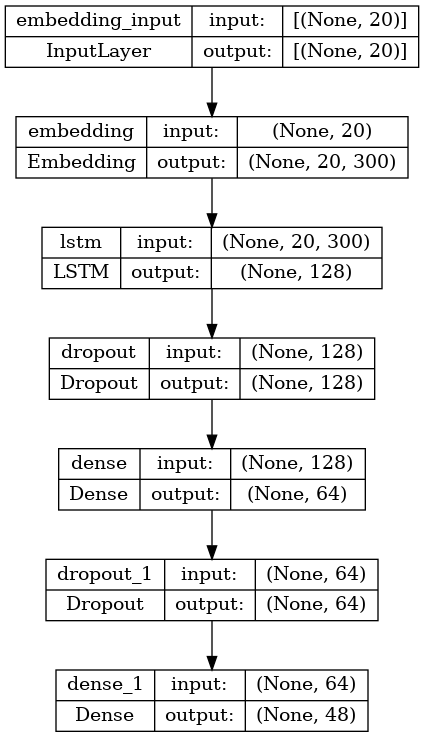

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_lstmtb.png', show_shapes=True, show_layer_names=True, rankdir="TB")

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20)
# model_save = ModelCheckpoint('model_lstm.hdf5', save_best_only= True, verbose=0)
batch_size = 32
num_epochs = 150
hist = model.fit(
    X_train,
    y_train, 
    epochs=num_epochs,  
    shuffle=True,
    validation_data=(X_test, y_test),
    batch_size=batch_size
    )
model.save("chatbot_model.h5")
test_loss, test_acc = model.evaluate(X_test, y_test)

# model.save("chatbot_model_py")
# callbacks=[model_save]
# tf.saved_model.save(model, "chatbot")



Epoch 1/150


2024-06-28 09:08:03.913886: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-06-28 09:08:04.668279: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f6edafce9a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-28 09:08:04.668326: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti with Max-Q Design, Compute Capability 7.5
2024-06-28 09:08:04.682178: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1719540484.789056    1857 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 [==============================] - 5s 98ms/step - loss: 3.8567 - acc: 0.0329 - val_loss: 3.8051 - val_acc: 0.0750
Epoch 2/150
20/20 [==============================] - 0s 15ms/step - loss: 3.7029 - acc: 0.0814 - val_loss: 3.6498 - val_acc: 0.1437
Epoch 3/150
20/20 [==============================] - 0s 22ms/step - loss: 3.4574 - acc: 0.1596 - val_loss: 3.4260 - val_acc: 0.1937
Epoch 4/150
20/20 [==============================] - 0s 25ms/step - loss: 3.2510 - acc: 0.1956 - val_loss: 3.1998 - val_acc: 0.2125
Epoch 5/150
20/20 [==============================] - 1s 28ms/step - loss: 3.0407 - acc: 0.2254 - val_loss: 2.8892 - val_acc: 0.2688
Epoch 6/150
20/20 [==============================] - 0s 15ms/step - loss: 2.7504 - acc: 0.2942 - val_loss: 2.5852 - val_acc: 0.3125
Epoch 7/150
20/20 [==============================] - 0s 22ms/step - loss: 2.4622 - acc: 0.3615 - val_loss: 2.1791 - val_acc: 0.5625
Epoch 8/150
20/20 [==============================] - 0s 15ms/step - loss: 2.1364 - acc: 

/home/ihsan/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from sklearn.metrics import f1_score,confusion_matrix, recall_score, precision_score
y_pred = model.predict(X_test)
y_pred_cls = y_pred.argmax(axis=1)

y_test_cls = y_test.argmax(axis=1)
f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')
recall = recall_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)
precision = precision_score(y_test_cls, y_pred_cls,average='weighted')
print("Accuracy:", test_acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Loss: ", test_loss) 


5/5 [==============================] - 0s 6ms/step
Accuracy: 0.9624999761581421
Precision:  0.9761011904761905
Recall:  0.9625
F1 Score:  0.9642893217893219
Loss:  0.255317747592926


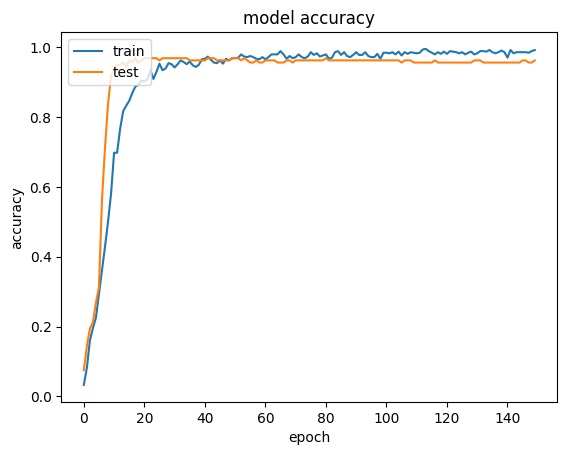

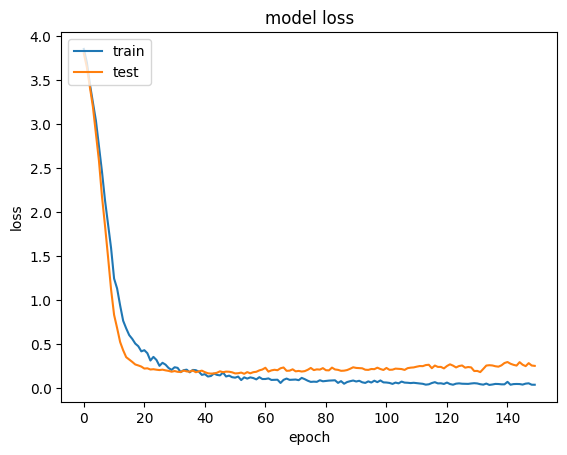

In [21]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Compare to GRU

In [22]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 
                              output_dim,
                              weights=[train_embedding_weights],
                              input_length=max_len),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])
from tensorflow.keras.layers import GRU
model_gru.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

model_gru.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 300)           34200     
                                                                 
 gru (GRU)                   (None, 128)               165120    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                3120      
                                                                 
Total params: 210696 (823.03 KB)
Trainable params: 210

In [23]:
hist = model_gru.fit(
    X_train,
    y_train, 
    epochs=num_epochs,  
    shuffle=True,
    validation_data=(X_test, y_test),
    batch_size=batch_size
    )
test_loss, test_acc = model_gru.evaluate(X_test, y_test)

Epoch 1/150
20/20 [==============================] - 3s 72ms/step - loss: 3.8842 - acc: 0.0360 - val_loss: 3.6997 - val_acc: 0.1437
Epoch 2/150
20/20 [==============================] - 1s 36ms/step - loss: 3.6188 - acc: 0.1064 - val_loss: 3.5294 - val_acc: 0.1937
Epoch 3/150
20/20 [==============================] - 0s 25ms/step - loss: 3.4010 - acc: 0.1534 - val_loss: 3.3316 - val_acc: 0.2188
Epoch 4/150
20/20 [==============================] - 0s 18ms/step - loss: 3.1828 - acc: 0.2066 - val_loss: 3.0923 - val_acc: 0.2812
Epoch 5/150
20/20 [==============================] - 0s 15ms/step - loss: 3.0343 - acc: 0.2254 - val_loss: 2.8424 - val_acc: 0.2875
Epoch 6/150
20/20 [==============================] - 0s 17ms/step - loss: 2.6922 - acc: 0.2895 - val_loss: 2.5907 - val_acc: 0.3688
Epoch 7/150
20/20 [==============================] - 0s 13ms/step - loss: 2.4738 - acc: 0.3271 - val_loss: 2.2879 - val_acc: 0.5312
Epoch 8/150
20/20 [==============================] - 0s 14ms/step - loss: 2.

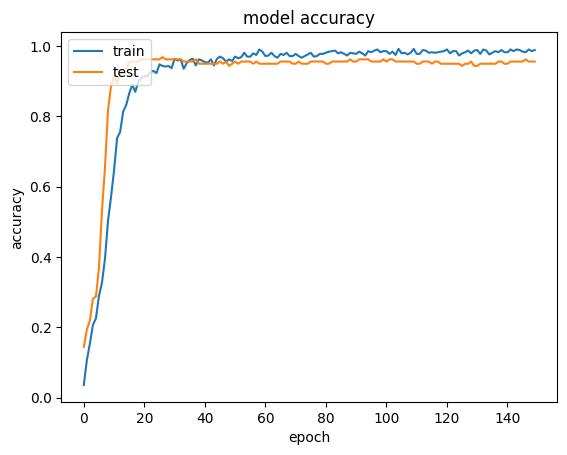

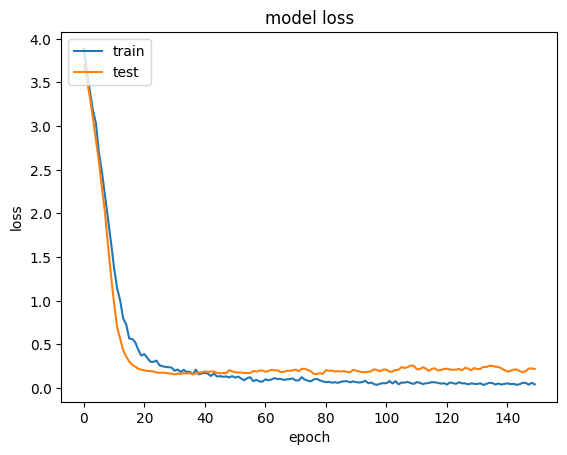

In [24]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
y_pred = model_gru.predict(X_test)
y_pred_cls = y_pred.argmax(axis=1)

# Convert y_test from one-hot encoding to class labels if necessary
y_test_cls = y_test.argmax(axis=1)

f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')
recall = recall_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)
precision = precision_score(y_test_cls, y_pred_cls,average='weighted')
print("Accuracy:", test_acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Loss: ", test_loss)

5/5 [==============================] - 0s 6ms/step
Accuracy: 0.956250011920929
Precision:  0.9689583333333335
Recall:  0.95625
F1 Score:  0.9566683663558664
Loss:  0.21997055411338806


### BiLSTM

In [26]:
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 
                              output_dim,
                              weights=[train_embedding_weights],
                              input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])
# sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model_bilstm.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

model_bilstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 300)           34200     
                                                                 
 bidirectional (Bidirection  (None, 256)               439296    
 al)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 48)                3120      
                                                      

In [27]:
hist = model_bilstm.fit(
    X_train,
    y_train, 
    epochs=num_epochs,  
    shuffle=True,
    validation_data=(X_test, y_test),
    batch_size=batch_size
    )
test_loss, test_acc = model_bilstm.evaluate(X_test, y_test)

Epoch 1/150
20/20 [==============================] - 5s 98ms/step - loss: 3.8315 - acc: 0.0329 - val_loss: 3.7652 - val_acc: 0.1187
Epoch 2/150
20/20 [==============================] - 1s 37ms/step - loss: 3.6596 - acc: 0.0845 - val_loss: 3.5528 - val_acc: 0.1375
Epoch 3/150
20/20 [==============================] - 0s 23ms/step - loss: 3.4187 - acc: 0.1315 - val_loss: 3.2812 - val_acc: 0.1688
Epoch 4/150
20/20 [==============================] - 0s 21ms/step - loss: 3.1260 - acc: 0.1878 - val_loss: 2.9660 - val_acc: 0.2062
Epoch 5/150
20/20 [==============================] - 0s 20ms/step - loss: 2.8341 - acc: 0.2676 - val_loss: 2.7177 - val_acc: 0.2562
Epoch 6/150
20/20 [==============================] - 0s 22ms/step - loss: 2.5952 - acc: 0.3036 - val_loss: 2.4322 - val_acc: 0.3688
Epoch 7/150
20/20 [==============================] - 0s 25ms/step - loss: 2.3475 - acc: 0.3459 - val_loss: 2.1530 - val_acc: 0.5375
Epoch 8/150
20/20 [==============================] - 0s 22ms/step - loss: 2.

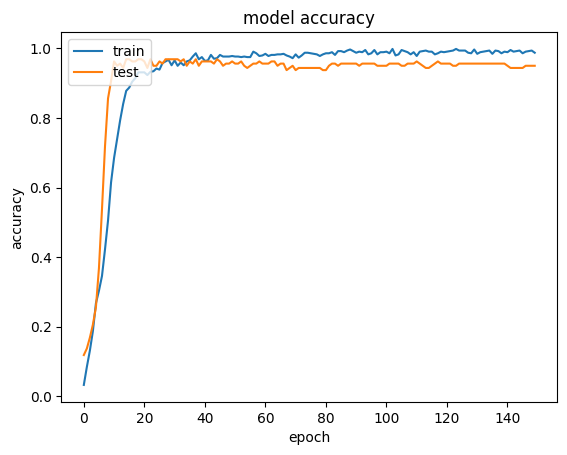

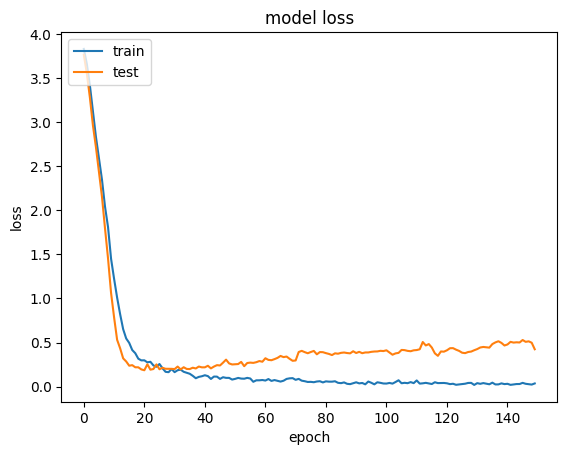

In [28]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
y_pred = model_bilstm.predict(X_test)
y_pred_cls = y_pred.argmax(axis=1)

# Convert y_test from one-hot encoding to class labels if necessary
y_test_cls = y_test.argmax(axis=1)
# matrix = confusion_matrix(y_test_cls, y_pred_cls)
# print("Matrix ", matrix)
# Calculate F1 score
f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')
recall = recall_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)
precision = precision_score(y_test_cls, y_pred_cls,average='weighted')
print("Accuracy:", test_acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Loss: ", test_loss)

5/5 [==============================] - 1s 7ms/step
Accuracy: 0.949999988079071
Precision:  0.9716666666666667
Recall:  0.95
F1 Score:  0.9541950757575757
Loss:  0.42342472076416016


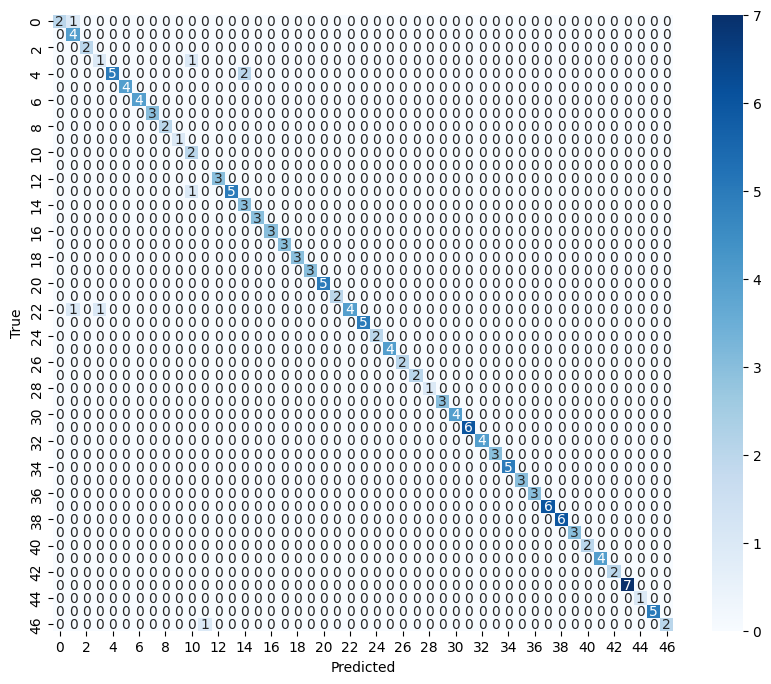

In [30]:

import seaborn as sns
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Cross Validation

In [31]:
from sklearn.model_selection import KFold
num_splits = 4
kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)
acc = []
loss = []
precisions = []
recalls = []
f1_scores = []
X = np.array(train)
y = classes
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, 
                                output_dim,
                                weights=[train_embedding_weights],
                                input_length=max_len),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(labels), activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
    model.fit(
        X_train,
        y_train, 
        epochs=num_epochs,  
        verbose=0
    )
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print("acc: %.2f%%" % (test_acc*100))
    print("loss: %.2f%%" % (test_loss*100))
   
    y_pred = model.predict(X_test)
    y_pred_cls = y_pred.argmax(axis=1)
    y_test_cls = y_test.argmax(axis=1)
   
    f1 = f1_score(y_test_cls, y_pred_cls, average='weighted', zero_division=0)
    recall = recall_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)
    precision = precision_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    precisions.append(precision * 100)
    recalls.append(recall * 100)
    f1_scores.append(f1 * 100)
    loss.append(test_loss * 100)
    acc.append(test_acc * 100)

print("avg loss = %.2f%% (+/- %.2f%%)" % (np.mean(loss), np.std(loss)))
print("avg acc = %.2f%% (+/- %.2f%%)" % (np.mean(acc), np.std(acc)))
print("avg recall = %.2f%% (+/- %.2f%%)" % (np.mean(recalls), np.std(recalls)))
print("avg precision = %.2f%% (+/- %.2f%%)" % (np.mean(precisions), np.std(precisions)))
print("avg f1_score = %.2f%% (+/- %.2f%%)" % (np.mean(f1_scores), np.std(f1_scores)))

acc: 95.50%
loss: 24.32%
7/7 [==============================] - 0s 5ms/step
Precision:  0.968720238095238
Recall:  0.955
F1 Score:  0.9544635576841459
acc: 99.00%
loss: 9.65%
7/7 [==============================] - 0s 6ms/step
Precision:  0.9911805555555556
Recall:  0.99
F1 Score:  0.9898888888888888
acc: 99.00%
loss: 2.49%
7/7 [==============================] - 0s 4ms/step
Precision:  0.9907142857142857
Recall:  0.99
F1 Score:  0.9896923076923076
acc: 98.99%
loss: 6.06%
7/7 [==============================] - 0s 5ms/step
Precision:  0.9932998324958123
Recall:  0.9899497487437185
F1 Score:  0.9899850127832144
avg loss = 10.63% (+/- 8.30%)
avg acc = 98.12% (+/- 1.51%)
avg recall = 98.12% (+/- 1.51%)
avg precision = 98.60% (+/- 1.00%)
avg f1_score = 98.10% (+/- 1.53%)


### Cross Val BiLSTM

In [32]:

kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)
acc = []
loss = []
precisions = []
recalls = []
f1_scores = []
X = np.array(train)
y = classes
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, 
                                output_dim,
                                weights=[train_embedding_weights],
                                input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(labels), activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
    model.fit(
        X_train,
        y_train, 
        epochs=num_epochs,  
        verbose=0
    )
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print("acc: %.2f%%" % (test_acc*100))
    print("loss: %.2f%%" % (test_loss*100))

    y_pred = model.predict(X_test)
    y_pred_cls = y_pred.argmax(axis=1)
    y_test_cls = y_test.argmax(axis=1)
   
    f1 = f1_score(y_test_cls, y_pred_cls, average='weighted', zero_division=0)
    recall = recall_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)
    precision = precision_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    precisions.append(precision * 100)
    recalls.append(recall * 100)
    f1_scores.append(f1 * 100)
    loss.append(test_loss * 100)
    acc.append(test_acc * 100)

print("avg loss = %.2f%% (+/- %.2f%%)" % (np.mean(loss), np.std(loss)))
print("avg acc = %.2f%% (+/- %.2f%%)" % (np.mean(acc), np.std(acc)))
print("avg recall = %.2f%% (+/- %.2f%%)" % (np.mean(recalls), np.std(recalls)))
print("avg precision = %.2f%% (+/- %.2f%%)" % (np.mean(precisions), np.std(precisions)))
print("avg f1_score = %.2f%% (+/- %.2f%%)" % (np.mean(f1_scores), np.std(f1_scores)))

acc: 95.50%
loss: 50.92%
7/7 [==============================] - 1s 9ms/step
Precision:  0.9758333333333334
Recall:  0.955
F1 Score:  0.9580021367521369
acc: 97.50%
loss: 13.04%
7/7 [==============================] - 1s 7ms/step
Precision:  0.9797222222222223
Recall:  0.975
F1 Score:  0.9744422268907563
acc: 99.00%
loss: 6.46%
7/7 [==============================] - 1s 11ms/step
Precision:  0.9923809523809524
Recall:  0.99
F1 Score:  0.9893589743589744
acc: 97.99%
loss: 14.11%
7/7 [==============================] - 1s 10ms/step
Precision:  0.9839674563292653
Recall:  0.9798994974874372
F1 Score:  0.9797690980446866
avg loss = 21.13% (+/- 17.44%)
avg acc = 97.50% (+/- 1.27%)
avg recall = 97.50% (+/- 1.27%)
avg precision = 98.30% (+/- 0.61%)
avg f1_score = 97.54% (+/- 1.14%)


### Cross Val GRU

In [33]:

kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)
acc = []
loss = []
precisions = []
recalls = []
f1_scores = []
X = np.array(train)
y = classes
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, 
                                output_dim,
                                weights=[train_embedding_weights],
                                input_length=max_len),
        tf.keras.layers.GRU(128),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(labels), activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
    model.fit(
        X_train,
        y_train, 
        epochs=num_epochs,  
        verbose=0
    )
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print("acc: %.2f%%" % (test_acc*100))
    print("loss: %.2f%%" % (test_loss*100))
    y_pred = model.predict(X_test)
    y_pred_cls = y_pred.argmax(axis=1)
    y_test_cls = y_test.argmax(axis=1)
   
    f1 = f1_score(y_test_cls, y_pred_cls, average='weighted', zero_division=0)
    recall = recall_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)
    precision = precision_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    precisions.append(precision * 100)
    recalls.append(recall * 100)
    f1_scores.append(f1 * 100)
    loss.append(test_loss * 100)
    acc.append(test_acc * 100)

print("avg loss = %.2f%% (+/- %.2f%%)" % (np.mean(loss), np.std(loss)))
print("avg acc = %.2f%% (+/- %.2f%%)" % (np.mean(acc), np.std(acc)))
print("avg recall = %.2f%% (+/- %.2f%%)" % (np.mean(recalls), np.std(recalls)))
print("avg precision = %.2f%% (+/- %.2f%%)" % (np.mean(precisions), np.std(precisions)))
print("avg f1_score = %.2f%% (+/- %.2f%%)" % (np.mean(f1_scores), np.std(f1_scores)))

acc: 95.50%
loss: 28.22%
7/7 [==============================] - 0s 6ms/step
Precision:  0.966220238095238
Recall:  0.955
F1 Score:  0.9533933729669024
acc: 99.00%
loss: 12.35%
7/7 [==============================] - 0s 5ms/step
Precision:  0.9922222222222223
Recall:  0.99
F1 Score:  0.9902222222222222
acc: 99.00%
loss: 5.43%
7/7 [==============================] - 0s 7ms/step
Precision:  0.9916666666666666
Recall:  0.99
F1 Score:  0.99
acc: 98.49%
loss: 14.08%
7/7 [==============================] - 0s 5ms/step
Precision:  0.9888609715242881
Recall:  0.9849246231155779
F1 Score:  0.9847365482382673
avg loss = 15.02% (+/- 8.28%)
avg acc = 98.00% (+/- 1.46%)
avg recall = 98.00% (+/- 1.46%)
avg precision = 98.47% (+/- 1.08%)
avg f1_score = 97.96% (+/- 1.53%)
